In [4]:
%load_ext autoreload
%autoreload 2

from pyba.CameraNetwork import CameraNetwork
import pickle
import glob

n_cameras = 7
image_path = './data/test/camera_{cam_id}_img_00000{img_id}.jpg'
pr_path = './data/test/df3d_2/pose_result*.pkl'
d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))
points2d = d['points2d']
calib = {cid:d[cid] for cid in range(n_cameras)}

camNet = CameraNetwork(points2d=points2d, calib=calib, image_path=image_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
_ = camNet.triangulate()

In [44]:
camNet.reprojection_error()

[9391.920300926151,
 9453.643800319574,
 32367.248323391632,
 0.0,
 6165.747968539907,
 6036.568070900493,
 5950.577912819873]

(-0.5, 6719.5, 479.5, -0.5)

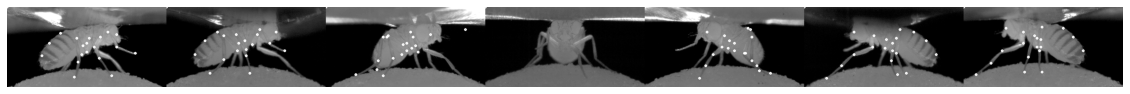

In [46]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='points2d')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')

(-0.5, 6719.5, 479.5, -0.5)

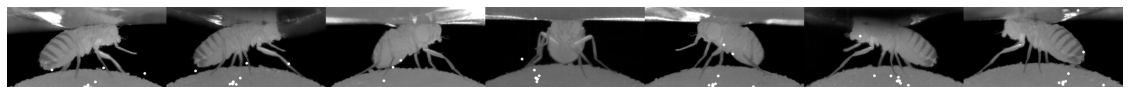

In [48]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='reprojection')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')

In [15]:
pts3d = camNet.triangulate()

array([[[ 1.61294911e+02, -4.49256470e+03, -2.34158242e+00],
        [-8.92010143e+01,  2.45862688e+03,  1.28444091e+00],
        [ 9.21363950e+01, -2.57381014e+03, -1.34126633e+00],
        ...,
        [ 1.88037775e+01,  4.71426676e+02,  4.85951422e-01],
        [ 1.12952392e+01,  2.88119428e+02,  3.01653415e-01],
        [ 1.03172652e+01,  2.64287914e+02,  2.81728801e-01]],

       [[ 1.61294911e+02, -4.49256470e+03, -2.34158242e+00],
        [-3.53368796e+01,  9.64233340e+02,  5.05015959e-01],
        [ 4.47387944e+01, -1.25165520e+03, -6.51755569e-01],
        ...,
        [ 1.88037775e+01,  4.71426676e+02,  4.85951422e-01],
        [ 1.48920183e+01,  3.72921955e+02,  3.85984467e-01],
        [ 4.67702678e+00,  8.71457339e+01,  6.32613384e-02]],

       [[ 1.61294911e+02, -4.49256470e+03, -2.34158242e+00],
        [-8.42245317e+01,  2.32061080e+03,  1.21243304e+00],
        [ 4.25518763e+01, -1.19092258e+03, -6.19233565e-01],
        ...,
        [ 1.41287931e+01,  3.53715107e+02,

In [6]:
import cv2

ModuleNotFoundError: No module named 'cv2'